# Objective:  Predict conversion rate  and  come up with recommendations for the product team and the marketing team to improve conversion rate
              

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split





# Load Dataset

In [2]:
# country : user country based on the IP address
#age : user age. Self-reported at sign-in step
#new_user : whether the user created the account during this session or had already an
#account and simply came back to the site
#source : marketing channel source
#Ads: came to the site by clicking on an advertisement
#Seo: came to the site by clicking on search results
#Direct: came to the site by directly typing the URL on the browser
#total_pages_visited: number of total pages visited during the session. This is a proxy for
#time spent on site and engagement during the session.
#converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. 
#The company goal is to increase conversion rate: # conversions / total sessions.

In [3]:
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000



##EDA
The max age seems to be an outlier as it has a value of 123.



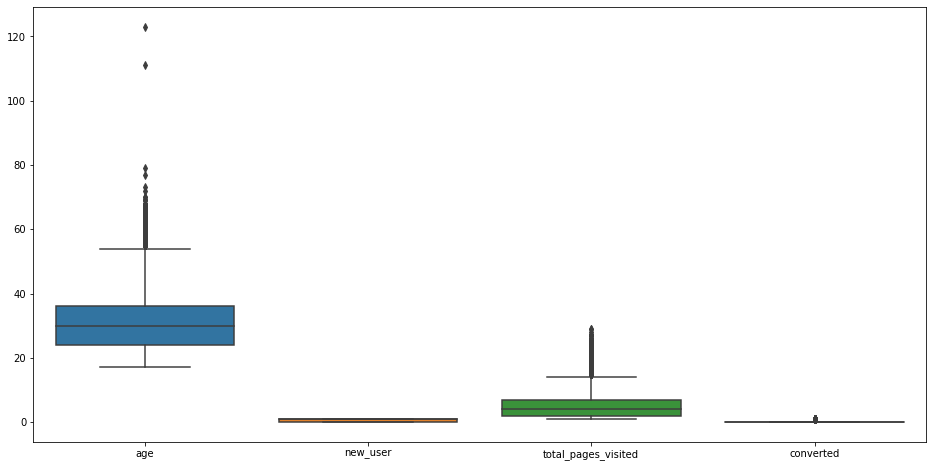

There are outliers in age “maximum” wherein datapoint is beyond the range of  Q3 + 1.5*IQR and “minimum”: Q1 -1.5*IQR 


In [6]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=data)
plt.show()
print("There are outliers in age “maximum” wherein datapoint is beyond the range of  Q3 + 1.5*IQR and “minimum”: Q1 -1.5*IQR ")

In [7]:
# We shall drop the outliers as there are only 2 and this shall not effect our model.

In [8]:
# Outliers in Age are visible
data=data[data['age']<100]

In [9]:
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()
grouped

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


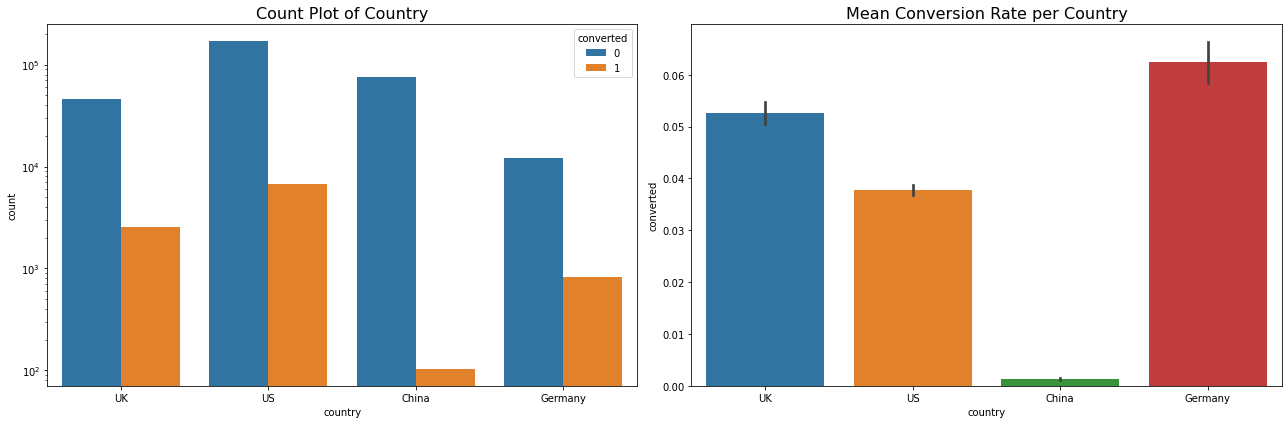

In [10]:
# Visualization of different countries
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

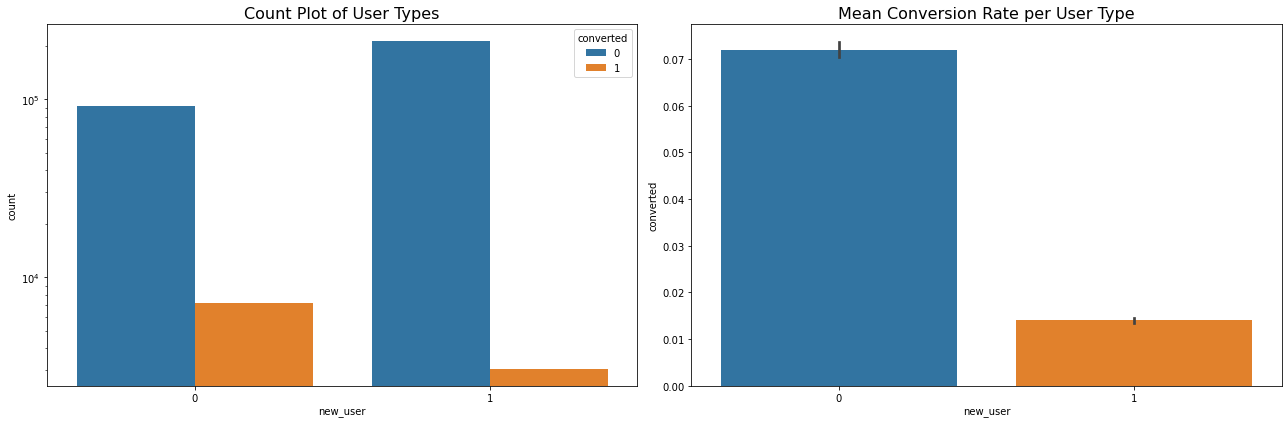

The no of new visior who converted is very high while mean conversion rate per user is lower for new users


In [40]:
# Visualization of different user types
grouped = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

print("The no of new visior who converted is very high while mean conversion rate per user is lower for new users")

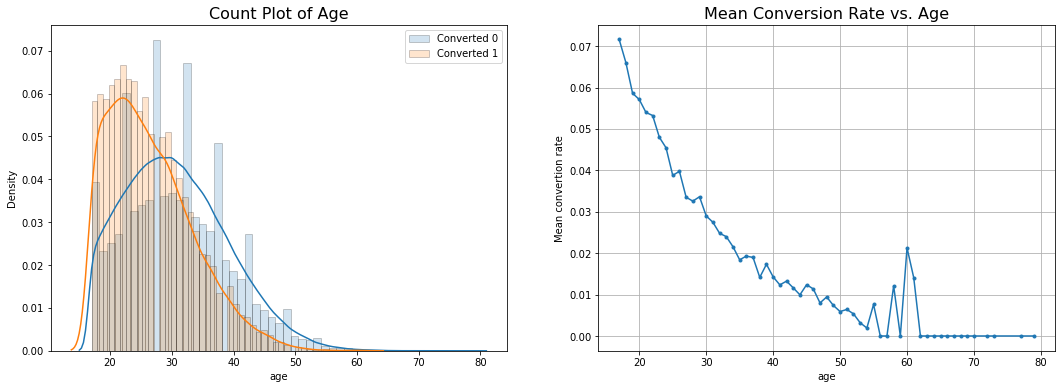

Higher the Age less the conversion rate


In [41]:
# Visualization of different sources
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()
print("Higher the Age less the conversion rate")

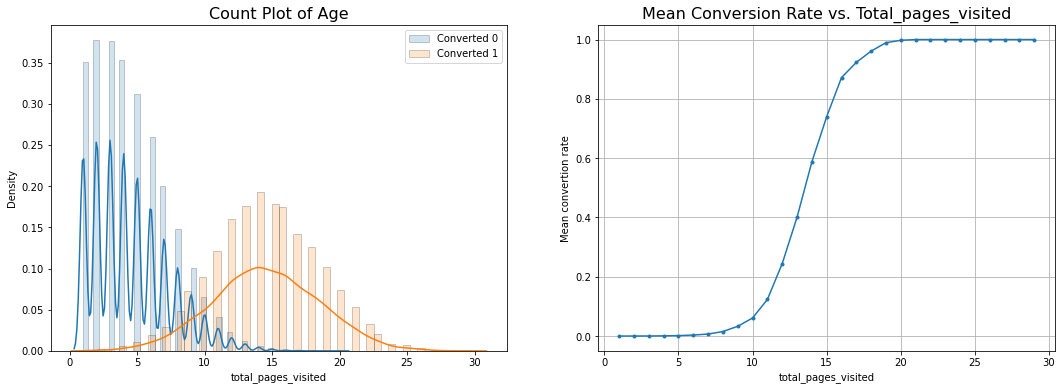

In [13]:
# Visualization of different sources
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

In [14]:
# Modelling

In [15]:
#Convert Gender categorical from 
data1=data.copy()
c_feat=data.loc[:,data.dtypes==np.object].columns
c_feat

Index(['country', 'source'], dtype='object')

In [16]:
for i in c_feat:
    mean =data.groupby([i])['converted'].mean()
    data[i]=data[i].map(mean)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,auc


In [18]:
# Train /Test split

In [19]:
X=data.drop('converted',axis=1)
y=data['converted']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
X_train.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

In [36]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 200, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

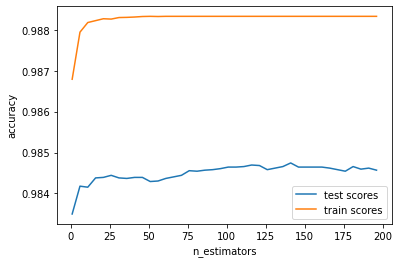

In [37]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


In [38]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1,len(feature), 1)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

Text(0.5, 0, 'max_features')

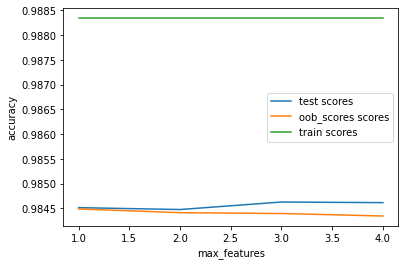

In [39]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features")

In [21]:
rf = RandomForestClassifier(max_features=1, oob_score=True, n_estimators=140, random_state=0).fit(X_train, y_train)

[0.03953079 0.10164368 0.03756483 0.0167574  0.8045033 ]


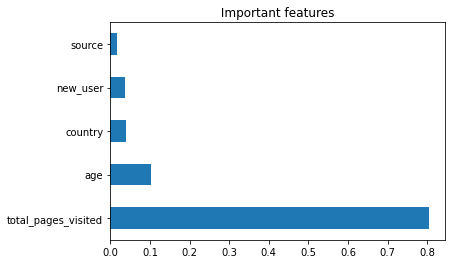

In [22]:
feature = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target = 'converted'
print(rf.feature_importances_)

feat_importances1 = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances1.nlargest().plot(kind='barh')
plt.title(" Important features ")
plt.show()

In [23]:

full_modpred_train=rf.predict(X_train)
full_modpred=rf.predict(X_test)


In [24]:
probas_fullmod=rf.predict_proba(X_test)
probas_fullmod_train=rf.predict_proba(X_train)


In [25]:
confusion_matrix(y_train,full_modpred_train)


array([[228759,    741],
       [  2024,   5624]], dtype=int64)

In [26]:
confusion_matrix(y_test,full_modpred)

array([[76110,   390],
       [  828,  1722]], dtype=int64)

In [27]:
from sklearn.metrics import auc, roc_curve, classification_report

In [28]:
fpr_ff_t, tpr_ff_t, thresholds_ff_t = roc_curve(y_train, probas_fullmod_train[:,1], pos_label=1)
fpr_ff, tpr_ff, thresholds_ff = roc_curve(y_test, probas_fullmod[:,1], pos_label=1)

# get area under the curve
roc_auc_ff = auc(fpr_ff, tpr_ff)
roc_auc_ff_t = auc(fpr_ff_t, tpr_ff_t)


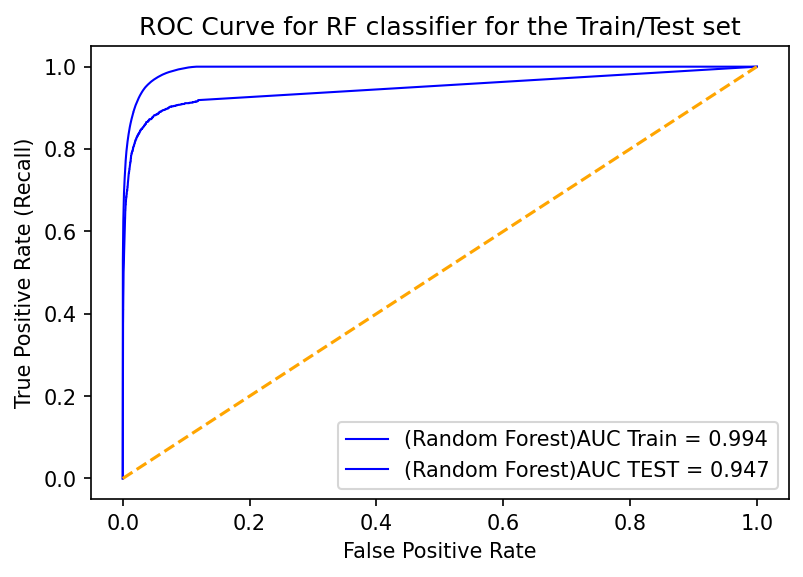

In [29]:
fpr_ff_t, tpr_ff_t, thresholds_ff_t = roc_curve(y_train, probas_fullmod_train[:,1], pos_label=1)
fpr_ff, tpr_ff, thresholds_ff = roc_curve(y_test, probas_fullmod[:,1], pos_label=1)

# get area under the curve
roc_auc_ff = auc(fpr_ff, tpr_ff)
roc_auc_ff_t = auc(fpr_ff_t, tpr_ff_t)

plt.figure(dpi=150)
plt.plot(fpr_ff_t, tpr_ff_t, lw=1, color='blue', label=f'(Random Forest)AUC Train = {roc_auc_ff_t:.3f}')
plt.plot(fpr_ff, tpr_ff, lw=1, color='blue', label=f'(Random Forest)AUC TEST = {roc_auc_ff:.3f}')
plt.title('ROC Curve for RF classifier for the Train/Test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()

 
plt.show()